# **Web Scraping Lab**
Estimated time needed: 30 minutes

# **Objectives**
After completing this lab you will be able to:

# **Table of Contents**
Beautiful Soup Object
Tag
Children, Parents, and Siblings
HTML Attributes
Navigable String

Filter
find All
find
HTML Attributes
Navigable String

**Downloading And Scraping The Contents Of A Web**
Estimated time needed: 25 min

For this lab, we are going to be using Python and several Python libraries. Some of these libraries might be installed in your lab environment or in SN Labs. Others may need to be installed by you. The cells below will install these libraries when executed.



In [2]:
import requests
response = requests.get("https://api.github.com")
print("Status Code:", response.status_code)


Status Code: 200


Import the required modules and functions

In [4]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

# **Beautiful Soup Objects**

Beautiful Soup is a Python library for pulling data out of HTML and XML files, we will focus on HTML files. This is accomplished by representing the HTML as a set of objects with methods used to parse the HTML. We can navigate the HTML as a tree and/or filter out what we are looking for.

Consider the following HTML:

In [6]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

We can store it as a string in the variable HTML:

In [8]:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

To parse a document, pass it into the BeautifulSoup constructor, the BeautifulSoup object, which represents the document as a nested data structure:



In [10]:
soup = BeautifulSoup(html, "html.parser")

First, the document is converted to Unicode, (similar to ASCII), and HTML entities are converted to Unicode characters. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. The BeautifulSoup object can create other types of objects. In this lab, we will cover BeautifulSoup and Tag objects that for the purposes of this lab are identical, and NavigableString objects.

We can use the method prettify() to display the HTML in the nested structure:

In [13]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>



# **Tags **

Let's say we want the title of the page and the name of the top paid player we can use the Tag. The Tag object corresponds to an HTML tag in the original document, for example, the tag title.



In [16]:
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>Page Title</title>


we can see the tag type bs4.element.Tag

In [18]:
print("tag object type:",type(tag_object))

tag object type: <class 'bs4.element.Tag'>


If there is more than one Tag with the same name, the first element with that Tag name is called, this corresponds to the most paid player:

In [20]:
tag_object=soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

Enclosed in the bold attribute b, it helps to use the tree representation. We can navigate down the tree using the child attribute to get the name.

Children, Parents, and Siblings
As stated above the Tag object is a tree of objects we can access the child of the tag or navigate down the branch as follows:

In [23]:
tag_child =tag_object.b
tag_child

<b id="boldest">Lebron James</b>

You can access the parent with the  parent

In [25]:
parent_tag=tag_child.parent
parent_tag

<h3><b id="boldest">Lebron James</b></h3>

this is identical to

In [27]:
tag_object

<h3><b id="boldest">Lebron James</b></h3>

tag_object parent is the body element.

In [29]:
tag_object.parent

<body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body>

Tag_object sibling is the paragraph element

In [31]:
sibling_1=tag_object.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

sibling_2 is the header element which is also a sibling of both sibling_1 and tag_object

In [33]:
sibling_2=sibling_1.next_sibling
sibling_2

<h3> Stephen Curry</h3>

# **Exercise: next_sibling** 
Using the object sibling_2 and the property next_sibling to find the salary of Stephen Curry:

In [35]:
sibling_2.next_sibling

<p> Salary: $85,000, 000 </p>

# **HTML Attributes** 
If the tag has attributes, the tag id="boldest" has an attribute id whose value is boldest. You can access a tag’s attributes by treating the tag like a dictionary:

In [38]:
tag_child['id']

'boldest'

You can access that dictionary directly as attrs:

In [45]:
tag_child.attrs

{'id': 'boldest'}

You can also work with Multi-valued attribute check out [1] for more.

We can also obtain the content if the attribute of the tag using the Python get() method.

In [58]:
tag_child.get('id')

'boldest'

# **Navigable String**
A string corresponds to a bit of text or content within a tag. Beautiful Soup uses the NavigableString class to contain this text. In our HTML we can obtain the name of the first player by extracting the sting of the Tag object tag_child as follows:

In [62]:
tag_string=tag_child.string
tag_string

'Lebron James'

we can verify the type is Navigable String

In [65]:
type(tag_string)

bs4.element.NavigableString

A NavigableString is just like a Python string or Unicode string, to be more precise. The main difference is that it also supports some BeautifulSoup features. We can covert it to sting object in Python:



In [68]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

# **Filter**
Filters allow you to find complex patterns, the simplest filter is a string. In this section we will pass a string to a different filter method and Beautiful Soup will perform a match against that exact string. Consider the following HTML of rocket launchs:

In [71]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


We can store it as a string in the variable table:

In [74]:
table="<table><tr><td id='flight' >Flight No</td><td>Launch site</td><td>Payload mass</td></tr><tr><td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a> </td><td>80 kg</td></tr></table>"

In [76]:
table_bs = BeautifulSoup(table, "html.parser")

# **find All**
The find_all() method looks through a tag’s descendants and retrieves all descendants that match your filters.

The Method signature for find_all(name, attrs, recursive, string, limit, **kwargs)

# **Name**
When we set the name parameter to a tag name, the method will extract all the tags with that name and its children.

In [79]:
table_rows=table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>,
 <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>]

The result is a Python Iterable just like a list, each element is a tag object:



In [82]:
first_row =table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>

The type is tag

In [85]:
print(type(first_row))

<class 'bs4.element.Tag'>


we can obtain the child

In [88]:
first_row.td

<td id="flight">Flight No</td>

If we iterate through the list, each element corresponds to a row in the table:

In [91]:
for i,row in enumerate(table_rows):
    print("row",i,"is",row)
    

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>
row 1 is <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>


As row is a cell object, we can apply the method find_all to it and extract table cells in the object cells using the tag td, this is all the children with the name td. The result is a list, each element corresponds to a cell and is a Tag object, we can iterate through this list as well. We can extract the content using the string attribute.



In [94]:
for i,row in enumerate(table_rows):
    print("row",i)
    cells=row.find_all('td')
    for j,cell in enumerate(cells):
        print('colunm',j,"cell",cell)

row 0
colunm 0 cell <td id="flight">Flight No</td>
colunm 1 cell <td>Launch site</td>
colunm 2 cell <td>Payload mass</td>
row 1
colunm 0 cell <td>1</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>
colunm 2 cell <td>300 kg</td>
row 2
colunm 0 cell <td>2</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
colunm 2 cell <td>94 kg</td>
row 3
colunm 0 cell <td>3</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td>
colunm 2 cell <td>80 kg</td>


If we use a list we can match against any item in that list.

In [97]:
list_input=table_bs .find_all(name=["tr", "td"])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td>,
 <td>80 kg</td>]

# **Attributes**
If the argument is not recognized it will be turned into a filter on the tag’s attributes. For example the id argument, Beautiful Soup will filter against each tag’s id attribute. For example, the first td elements have a value of id of flight, therefore we can filter based on that id value.

In [100]:
table_bs.find_all(id="flight")

[<td id="flight">Flight No</td>]

We can find all the elements that have links to the Florida Wikipedia page:

In [103]:
list_input=table_bs.find_all(href="https://en.wikipedia.org/wiki/Florida")
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

If we set the href attribute to True, regardless of what the value is, the code finds all tags with href value:



In [106]:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

There are other methods for dealing with attributes and other related methods; Check out the following link

# **Exercise: find_all**
Using the logic above, find all the elements without href value

In [110]:
soup.find_all(id="boldest")

[<b id="boldest">Lebron James</b>]

# **string**

With string you can search for strings instead of tags, where we find all the elments with Florida:



In [114]:
table_bs.find_all(string="Florida")

['Florida', 'Florida']

# **find**
The find_all() method scans the entire document looking for results, it’s if you are looking for one element you can use the find() method to find the first element in the document. Consider the following two table:



In [117]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>
  
    
<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td> 
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


We store the HTML as a Python string and assign two_tables:

In [120]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

We create a BeautifulSoup object two_tables_bs

In [123]:
two_tables_bs= BeautifulSoup(two_tables, 'html.parser')

We can find the first table using the tag name table

In [126]:
two_tables_bs.find("table")

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

We can filter on the class attribute to find the second table, but because class is a keyword in Python, we add an underscore.



In [129]:
two_tables_bs.find("table",class_='pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

# **Downloading And Scraping The Contents Of A Web Page**
We Download the contents of the web page:

In [132]:
url = "https://web.archive.org/web/20230224123642/https://www.ibm.com/us-en/"

We use get to download the contents of the webpage in text format and store in a variable called data:

In [135]:
data  = requests.get(url).text 

We create a BeautifulSoup object using the BeautifulSoup constructor

In [137]:
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'

Scrape all links

In [139]:
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>

    print(link.get('href'))


https://web.archive.org/web/20230224123642/https://www.ibm.com/reports/threat-intelligence/
https://web.archive.org/web/20230224123642/https://www.ibm.com/about
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/strategy/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/ibmix?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/technology/
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/operations/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/strategic-partnerships
https://web.archive.org/web/20230224123642/https://www.ibm.com/employment/?lnk=flatitem
https://web.archive.org/web/20230224123642/https://www.ibm.com/impact
https://web.archive.org/web/20230224123642/https://research.ibm.com/
https://web.archive.org/web/20230224123642/https://www.ibm.com/


# **Scrape all images Tags¶**

In [141]:
for link in soup.find_all('img'):# in html image is represented by the tag <img>
    print(link)
    print(link.get('src'))

<img alt="Person standing with arms crossed" aria-describedby="bx--image-1" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/0a23e414312bcb6f/08196d0e04260ae5_cropped.jpg.global.sr_16x9.jpg"/>
https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/0a23e414312bcb6f/08196d0e04260ae5_cropped.jpg.global.sr_16x9.jpg
<img alt="Team members at work in a conference room" aria-describedby="bx--image-2" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/06655c075aa3aa29/CaitOppermann_2019_12_06_IBMGarage_DSC3304.jpg.global.m_16x9.jpg"/>
https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/06655c075aa3aa29/CaitOppermann_2019_12_06_IBMGarage_DSC3304.jpg.global.m_16x9.jpg
<img alt="Coworkers looking at laptops" aria-describedby="bx--image-3" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/08f951353c2707b8/052022_CaitOp

# **Scrape data from HTML tables**

In [143]:
#The below url contains an html table with data about colors and color codes.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

Before proceeding to scrape a web site, you need to examine the contents, and the way data is organized on the website. Open the above url in your browser and check how many rows and columns are there in the color table.

In [145]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [146]:
soup = BeautifulSoup(data,"html.parser")

In [147]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

In [148]:
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF


# **Scrape data from HTML tables into a DataFrame using BeautifulSoup and Pandas**

In [150]:
import pandas as pd

In [151]:
#The below url contains html tables with data about world population.
url = "https://en.wikipedia.org/wiki/World_population"

Before proceeding to scrape a web site, you need to examine the contents, and the way data is organized on the website. Open the above url in your browser and check the tables on the webpage.

In [153]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [154]:
soup = BeautifulSoup(data,"html.parser")

In [155]:
# find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

In [156]:
# we can see how many tables were found by checking the length of the tables list
len(tables)

30

Assume that we are looking for the 10 most densly populated countries table, we can look through the tables list and find the right one we are look for based on the data in each table or we can search for the table name if it is in the table but this option might not always work.

In [158]:
for index,table in enumerate(tables):
    if ("10 most densely populated countries" in str(table)):
        table_index = index
print(table_index)

7


See if you can locate the table name of the table, 10 most densly populated countries, below.

In [160]:
print(tables[table_index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  10 most densely populated countries
  <small>
   (with population above 5 million)
  </small>
  <sup class="reference" id="cite_ref-:10_104-0">
   <a href="#cite_note-:10-104">
    <span class="cite-bracket">
     [
    </span>
    99
    <span class="cite-bracket">
     ]
    </span>
   </a>
  </sup>
 </caption>
 <tbody>
  <tr>
   <th scope="col">
    Rank
   </th>
   <th scope="col">
    Country
   </th>
   <th scope="col">
    Population
   </th>
   <th scope="col">
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th scope="col">
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon">
     <span class="mw-image-border" typeof="mw:File">
      <span>
       <img alt="" class="mw-file-element" data-file-height="600" data-fi

In [161]:
import pandas as pd

population_data = pd.DataFrame(columns=["Rank", "Country", "Population", "Area", "Density"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if len(col) == 5:  # Ensure there are 5 columns
        rank = col[0].text.strip()
        country = col[1].text.strip()
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()

        # Create a new DataFrame for the row
        new_row = pd.DataFrame({
            "Rank": [rank],
            "Country": [country],
            "Population": [population],
            "Area": [area],
            "Density": [density]
        })

        # Concatenate the new row to the main DataFrame
        population_data = pd.concat([population_data, new_row], ignore_index=True)

print(population_data)


  Rank                 Country     Population       Area Density
0    1               Singapore      5,921,231        719   8,235
1    2              Bangladesh    165,650,475    148,460   1,116
2    3  Palestine[note 3][100]      5,223,000      6,025     867
3    4          Taiwan[note 4]     23,580,712     35,980     655
4    5             South Korea     51,844,834     99,720     520
5    6                 Lebanon      5,296,814     10,400     509
6    7                  Rwanda     13,173,730     26,338     500
7    8                 Burundi     12,696,478     27,830     456
8    9                  Israel      9,402,617     21,937     429
9   10                   India  1,389,637,446  3,287,263     423


# **Scrape data from HTML tables into a DataFrame using BeautifulSoup and read_html**
Using the same url, data, soup, and tables object as in the last section we can use the read_html function to create a DataFrame.

Remember the table we need is located in tables[table_index]

We can now use the pandas function read_html and give it the string version of the table as well as the flavor which is the parsing engine bs4.

In [163]:
from bs4 import BeautifulSoup
import pandas as pd

# Sample HTML table (replace this with your actual HTML content)
html_content = '''Your HTML content above as a string'''

# Parse HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the table
tables = soup.find_all('table', class_='wikitable')  # You may adjust 'class' based on your table

# Ensure the table exists
if len(tables) > 0:
    print("Table found!")
else:
    print("No tables found.")


No tables found.


In [164]:
print("Number of tables:", len(tables))
if len(tables) > 0:
    table_html = str(tables[0])
    df = pd.read_html(table_html, flavor='bs4')[0]
    print(df.head())
else:
    print("No tables found. Please check your HTML content.")


Number of tables: 0
No tables found. Please check your HTML content.


In [165]:
population_data["Population"] = population_data["Population"].str.replace(",", "").astype(int)
population_data["Area"] = population_data["Area"].str.replace(",", "").astype(int)
population_data["Density"] = population_data["Density"].str.replace(",", "").astype(int)


In [166]:
population_data.to_csv("population_data.csv", index=False)


In [171]:
print(population_data.describe())  # Summary statistics


         Population          Area     Density
count  1.000000e+01  1.000000e+01    10.00000
mean   1.682427e+08  3.664672e+05  1371.00000
std    4.319508e+08  1.027321e+06  2422.01413
min    5.223000e+06  7.190000e+02   423.00000
25%    6.791578e+06  1.328425e+04   467.00000
50%    1.293510e+07  2.708400e+04   514.50000
75%    4.477880e+07  8.378500e+04   814.00000
max    1.389637e+09  3.287263e+06  8235.00000


In [173]:
df = population_data  # Assign population_data to df
print(df.head())  # Now, this will work


  Rank                 Country  Population    Area  Density
0    1               Singapore     5921231     719     8235
1    2              Bangladesh   165650475  148460     1116
2    3  Palestine[note 3][100]     5223000    6025      867
3    4          Taiwan[note 4]    23580712   35980      655
4    5             South Korea    51844834   99720      520


We can see there are 25 DataFrames just like when we used find_all on the soup object.

In [181]:
import matplotlib.pyplot as plt


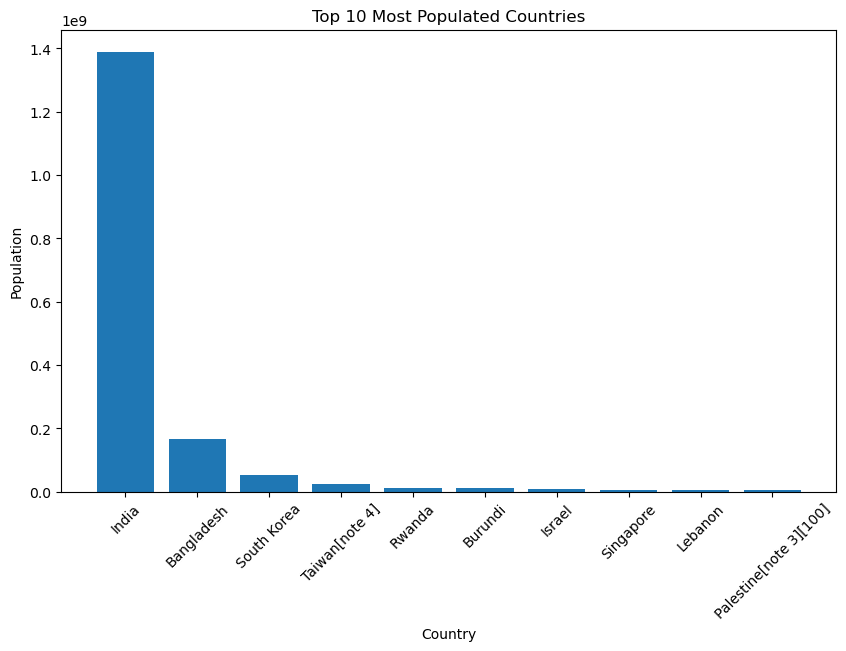

In [193]:
top_10_countries = population_data.sort_values(by="Population", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries["Country"], top_10_countries["Population"])
plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Top 10 Most Populated Countries")
plt.xticks(rotation=45)
plt.show()


In [196]:
max_population_country = population_data.loc[population_data["Population"].idxmax()]
min_population_country = population_data.loc[population_data["Population"].idxmin()]

print("Country with the highest population:")
print(max_population_country)

print("\nCountry with the lowest population:")
print(min_population_country)


Country with the highest population:
Rank                  10
Country            India
Population    1389637446
Area             3287263
Density              423
Name: 9, dtype: object

Country with the lowest population:
Rank                               3
Country       Palestine[note 3][100]
Population                   5223000
Area                            6025
Density                          867
Name: 2, dtype: object


In [198]:
large_population_countries = population_data[population_data["Population"] > 200_000_000]
print("Countries with population greater than 200 million:")
print(large_population_countries)


Countries with population greater than 200 million:
  Rank Country  Population     Area  Density
9   10   India  1389637446  3287263      423


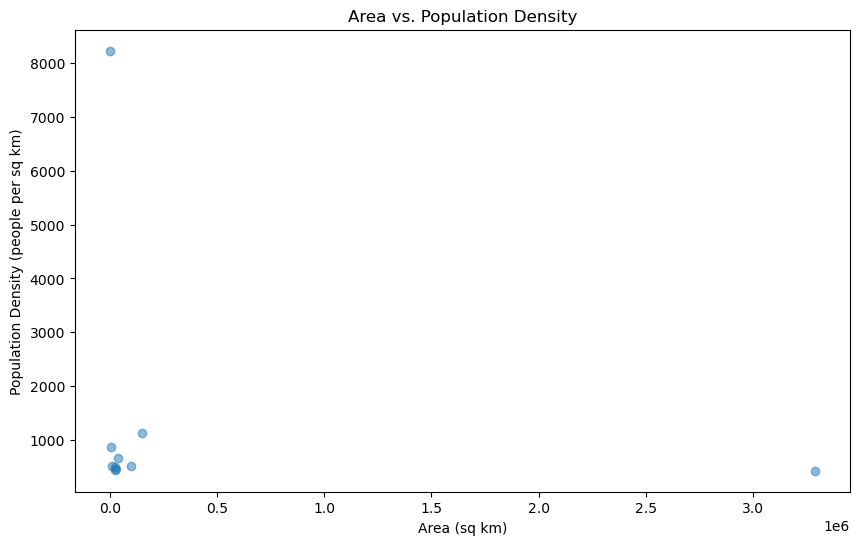

In [199]:
plt.figure(figsize=(10, 6))
plt.scatter(population_data["Area"], population_data["Density"], alpha=0.5)
plt.xlabel("Area (sq km)")
plt.ylabel("Population Density (people per sq km)")
plt.title("Area vs. Population Density")
plt.show()


In [201]:
correlation_matrix = population_data[["Population", "Area", "Density"]].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            Population      Area   Density
Population    1.000000  0.997343 -0.150719
Area          0.997343  1.000000 -0.149191
Density      -0.150719 -0.149191  1.000000


In [204]:
print(df.describe())


         Population          Area     Density
count  1.000000e+01  1.000000e+01    10.00000
mean   1.682427e+08  3.664672e+05  1371.00000
std    4.319508e+08  1.027321e+06  2422.01413
min    5.223000e+06  7.190000e+02   423.00000
25%    6.791578e+06  1.328425e+04   467.00000
50%    1.293510e+07  2.708400e+04   514.50000
75%    4.477880e+07  8.378500e+04   814.00000
max    1.389637e+09  3.287263e+06  8235.00000


<Axes: title={'center': 'Top 10 Most Populous Countries'}, xlabel='Country'>

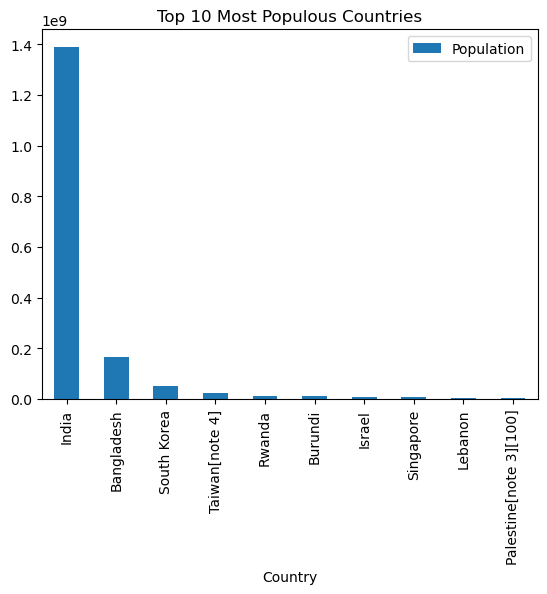

In [208]:
top10_countries = df.sort_values(by='Population', ascending=False).head(10)
top10_countries.plot(kind='bar', x='Country', y='Population', title='Top 10 Most Populous Countries')


In [210]:
!pip install folium


  Using cached folium-0.19.4-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
Using cached folium-0.19.4-py2.py3-none-any.whl (110 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)


In [211]:
import folium

# Create a world map centered at a global point
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Example coordinates (replace with actual latitude/longitude columns if available)
for i, row in df.iterrows():
    folium.CircleMarker(location=[row.get("Latitude", 0), row.get("Longitude", 0)],  # Ensure lat/lon columns exist
                        radius=5, color='blue', popup=row["Country"]).add_to(world_map)

# Show the map
world_map


In [212]:
correlation = df[['Population', 'Area', 'Density']].corr()
print(correlation)


            Population      Area   Density
Population    1.000000  0.997343 -0.150719
Area          0.997343  1.000000 -0.149191
Density      -0.150719 -0.149191  1.000000


<Axes: >

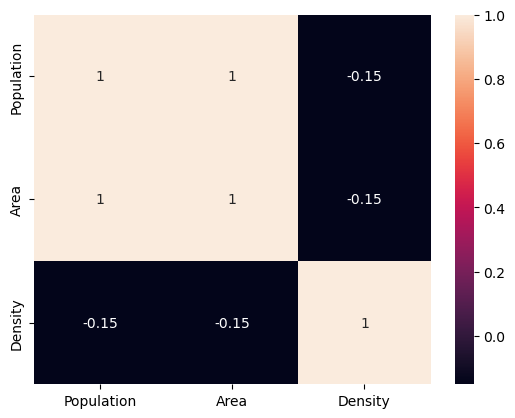

In [213]:
import seaborn as sns
sns.heatmap(correlation, annot=True)


In [233]:
# Save as CSV
csv_file_path = "/Users/purushottamphuyal/Desktop/Untitled.csv"
df.to_csv(csv_file_path, index=False)
print(f"File saved successfully as: {csv_file_path}")


File saved successfully as: /Users/purushottamphuyal/Desktop/Untitled.csv


In [235]:
# Import required libraries
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load CSV data
csv_file_path = "/Users/purushottamphuyal/Desktop/Untitled.csv"
df = pd.read_csv(csv_file_path)

# Set the title of the Streamlit app
st.title("World Population Data Dashboard")

# Show dataset preview
st.write("### Dataset Preview")
st.write(df.head())  # Display first few rows

# Correlation Heatmap
st.write("### Correlation Heatmap")
if 'Population' in df.columns and 'Area' in df.columns:
    correlation = df[['Population', 'Area', 'Density']].corr()
    fig, ax = plt.subplots()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=ax)
    st.pyplot(fig)

# Interactive Scatter Map using Plotly
st.write("### Interactive World Population Map")
if 'Country' in df.columns:
    fig_map = px.scatter_geo(df, locations="Country", locationmode="country names",
                             size="Population", hover_name="Country",
                             projection="natural earth", title="Population by Country")
    st.plotly_chart(fig_map)

# Sidebar Filters
st.sidebar.title("Filter Options")
selected_country = st.sidebar.selectbox("Select a Country", df['Country'].unique())
filtered_data = df[df['Country'] == selected_country]
st.write(f"### Population Data for {selected_country}")
st.write(filtered_data)
